# Ahmad Firdaus Azri

## What combination of Device and Internet Type produces the best adaptivity level of students to online classes? What is the worst? 


Device and Internet Type columns caught my attention because different combinations of devices (Mobile, Tab & Computer) and internet type (Mobile data & Wi-Fi) result to different / similar adaptivity level of students. Thus, I am wondering if there are certain combinations of these components that result to "High" and "Low" adaptivity level the most. 

### My plan:
Used columns: 
- Network Type
- Internet Type
- Device
- Adaptivity Level

Definition of: 
- Best combination: A combination whose frequency of **high** `Adaptivity Level` is the highest
- Worst combination: A combination whose frequency of **low** `Adaptivity Level` is the highest

Chosen data visualization for exploratory:
- Scatter plot: To see the distribution of data points based on `Internet Type` and `Device` as it able to roughly visualizes which combination has the most or the least count of students. Besides, it is possible also to have 0 student who has certain combination used for their online education. 
- Heatmap: Perform the same function as scatter plot but it might be more suitable and provide more insight about the dataset
- Point plot: To be able to detect which combination is the best and the worst instantly based on the height of the data points. 
- Count plot: Performing the same function as point plot but with different visualization because it looks exactly like a barplot.

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

mainDF = pd.read_csv("../data/raw/adaptability.csv")
mainDF

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,Girl,16-20,College,Non Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Low
1201,Girl,16-20,College,Non Government,No,No,High,Mid,Wifi,4G,3-6,No,Mobile,Moderate
1202,Boy,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,3G,1-3,No,Mobile,Moderate
1203,Girl,16-20,College,Non Government,No,No,Low,Mid,Wifi,4G,1-3,No,Mobile,Low


In [3]:
df = mainDF.drop(["Gender", "Age", "Education Level", "Institution Type", "IT Student", "Location", "Load-shedding", "Financial Condition", "Class Duration", "Self Lms"], axis = "columns")
df

,Internet Type,Network Type,Device,Adaptivity Level
0,Wifi,4G,Tab,Moderate
1,Mobile Data,4G,Mobile,Moderate
2,Wifi,4G,Mobile,Moderate
3,Mobile Data,4G,Mobile,Moderate
4,Mobile Data,3G,Mobile,Low
...,...,...,...,...
1200,Wifi,4G,Mobile,Low
1201,Wifi,4G,Mobile,Moderate
1202,Mobile Data,3G,Mobile,Moderate
1203,Wifi,4G,Mobile,Low


In [4]:
# To see if there is any missing values in each column in df
df.isna().sum()

Internet Type       0
Network Type        0
Device              0
Adaptivity Level    0
dtype: int64

Looks like there is no missing values in all needed columns. Thus, there is no need to deal with them.

In [5]:
# To see how many unique values are there in every columns in df
df.nunique()

Internet Type       2
Network Type        3
Device              3
Adaptivity Level    3
dtype: int64

In [6]:
# To see what are those unique values in each columns in df
df.apply(lambda col : col.unique())

Internet Type           [Wifi, Mobile Data]
Network Type                   [4G, 3G, 2G]
Device              [Tab, Mobile, Computer]
Adaptivity Level      [Moderate, Low, High]
dtype: object

In [7]:
# This code help us to observe amount of unique values and which of them has the most frequency in each column in df
df.describe()

,Internet Type,Network Type,Device,Adaptivity Level
count,1205,1205,1205,1205
unique,2,3,3,3
top,Mobile Data,4G,Mobile,Moderate
freq,695,775,1013,625


---

First and foremost, it is important to identify how many combinations available and what are they. Since we have 3 types of `Devices` (Computer, Tab & Mobile) 2 kinds of `Internet Type` (Wifi & Mobile Data), so it is certain that there are 6 combinations of `Device` and `Internet Type` altogether. 

Combinations: 
- Wifi & Computer (W + C)
- Wifi & Tab (W + T)
- Wifi & Mobile (W + M)
- Mobile Data & Computer (MD + C)
- Mobile Data & Tab (MD + T)
- Mobile Data & Mobile (MD + M)

Those acronym in each parentheses will be frequently used in later analysis. Therefore, it is wise to create a new column in `df` named `Combination` which states what combination of `Device` and `Internet Type`each student has.

In [8]:
def combineDeviceInternet(df):
    if((df["Internet Type"] == "Wifi") and (df["Device"] == "Computer")):
        return "W + C"
    elif((df["Internet Type"] == "Wifi") and (df["Device"] == "Tab")):
        return "W + T"
    elif((df["Internet Type"] == "Wifi") and (df["Device"] == "Mobile")):
        return "W + M"
    elif((df["Internet Type"] == "Mobile Data") and (df["Device"] == "Computer")):
        return "MD + C"
    elif((df["Internet Type"] == "Mobile Data") and (df["Device"] == "Tab")):
        return "MD + T"
    else: 
        return "MD + M"

In [9]:
df["Combination"] = df.apply(combineDeviceInternet, axis = "columns")
df

,Internet Type,Network Type,Device,Adaptivity Level,Combination
0,Wifi,4G,Tab,Moderate,W + T
1,Mobile Data,4G,Mobile,Moderate,MD + M
2,Wifi,4G,Mobile,Moderate,W + M
3,Mobile Data,4G,Mobile,Moderate,MD + M
4,Mobile Data,3G,Mobile,Low,MD + M
...,...,...,...,...,...
1200,Wifi,4G,Mobile,Low,W + M
1201,Wifi,4G,Mobile,Moderate,W + M
1202,Mobile Data,3G,Mobile,Moderate,MD + M
1203,Wifi,4G,Mobile,Low,W + M


---

For our first data visualization, let's try **categorical scatter plot**.

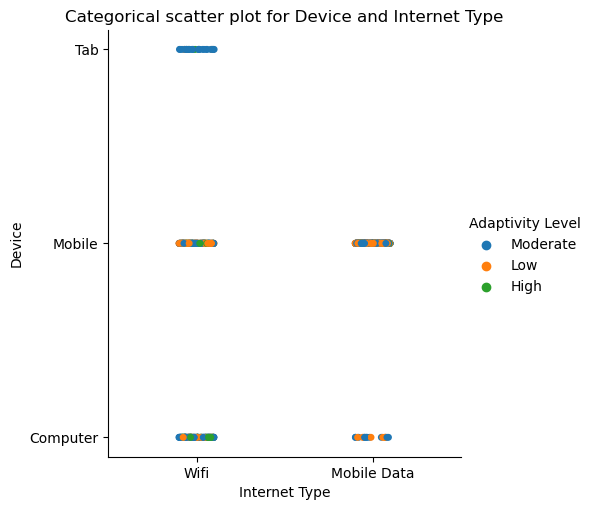

In [7]:
sns.catplot(data = df, x = "Internet Type", y = "Device", hue = "Adaptivity Level").set(title = "Categorical scatter plot for Device and Internet Type")

### Observation from categorical scatter plot: 

Well, that does not really help us in finding the answer because:
- Those plots are overlapping with each other despite of their different colours.
- It is very unclear which combination has the most count for high and low adaptivity level.

However, at this point we know that there is no student who has a combination of Tab and Mobile Data for their online classes since there is not data plot marked for it. 

---

Now, let's try **point plot**. But before that, we need a set of numerical data to do so and it is a problem because we do not have anything numerical in our dataset yet. So, the count of `Adaptivity Level` (Low, Moderate, High) will be our numerical data. To do so, we need to do some wranggling process with our `df` before produce a point plot.

In [5]:
df1 = df[df["Combination"] == "W + C"]
df2 = df[df["Combination"] == "W + T"]
df3 = df[df["Combination"] == "W + M"]
df4 = df[df["Combination"] == "MD + C"]
df5 = df[df["Combination"] == "MD + T"]
df6 = df[df["Combination"] == "MD + M"]

In [6]:
def countLevel(df):
    high = (df["Adaptivity Level"].values == "High").sum()
    mod = (df["Adaptivity Level"].values == "Moderate").sum()
    low = (df["Adaptivity Level"].values == "Low").sum()
    return [high, mod, low]

In [7]:
count1 = countLevel(df1)
count2 = countLevel(df2)
count3 = countLevel(df3)
count4 = countLevel(df4)
count5 = countLevel(df5)
count6 = countLevel(df6)

In [8]:
countDict = {"Combination" : ["W + C", "W + C", "W + C", "W + T", "W + T", "W + T", "W + M", "W + M", "W + M", 
                              "MD + C", "MD + C", "MD + C", "MD + T", "MD + T", "MD + T", "MD + M", "MD + M", "MD + M"], 
             "Adaptivity Level" : ["High", "Moderate", "Low", "High", "Moderate", "Low", "High", "Moderate", "Low", 
                                   "High", "Moderate", "Low", "High", "Moderate", "Low", "High", "Moderate", "Low"],
             "Count" : [count1[0], count1[1], count1[2], count2[0], count2[1], count2[2], count3[0], count3[1], count3[2], 
                        count4[0], count4[1], count4[2], count5[0], count5[1], count5[2], count6[0], count6[1], count6[2]]
            }

countDF = pd.DataFrame(countDict)
countDF

,Combination,Adaptivity Level,Count
0,W + C,High,30
1,W + C,Moderate,81
2,W + C,Low,32
3,W + T,High,2
4,W + T,Moderate,26
5,W + T,Low,2
6,W + M,High,32
7,W + M,Moderate,147
8,W + M,Low,158
9,MD + C,High,0


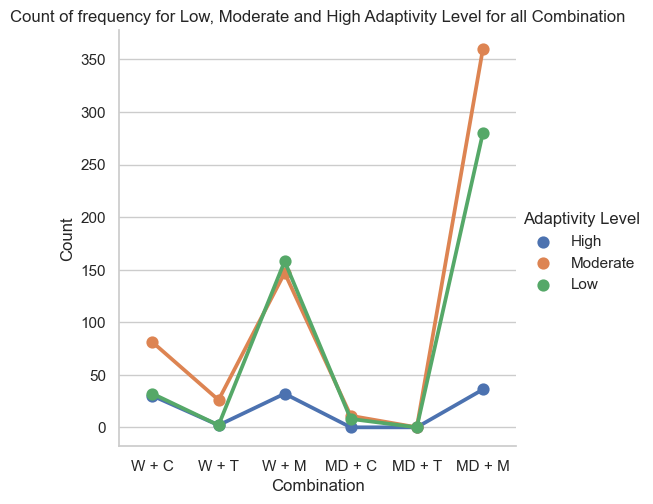

In [9]:
# Construct a point plot
sns.set_theme(style = "whitegrid")
sns.catplot(data = countDF, x = "Combination", y = "Count", hue = "Adaptivity Level", kind = "point").set(title = "Count of frequency for Low, Moderate and High Adaptivity Level for all Combination")

### **Observation from point plot:**

**For the name of `Combination` on x-axis, please refer to the acronym description stated above**

This plot is much better than the previous scatter plot because we can see the frequencies of high, moderate and low of `Adaptivity Level` for each combination. 

Combination of `MD + M` (Mobile Data and Mobile) produces significantly greater counts of Moderate and Low compared to the other combinations. This is mainly because out of all 6 subsets created above, `df6` (dedicated for Mobile Data and Mobile combination) has the most rows. So, it has a greater chance to return a higher count for all 3 levels. 

Overlapping data points indicate approximately equal count for different `Adaptivity Level` from the same combination. For instance, the combination of `W + C` (WiFi and Computer) and `W + T` (WiFi and Tab). Each of them has almost equal or equal count of High and Low.

However, there is a problem. Unlike for low level, we are not be able to say which combination has the most count for high level because visually, all of those 3 blue points from combination of `W + C`, `W + M` and `MD + M` are approximately on the same height. Thus, we need another visualization that can certainly says which `Combination` has the most count for both low and high level of adaptation to online classes.

---

Fortunately, we can use **countplot** which do the same thing but it allows us to get the visualization way faster because we do not have to wranggle our dataset to get the count values. Visually, it looks exactly like a barplot.

[Text(0.5, 1.0, 'Count of frequency for all Combination based on their Adaptivity Level'),
 Text(0, 0.5, 'Count')]

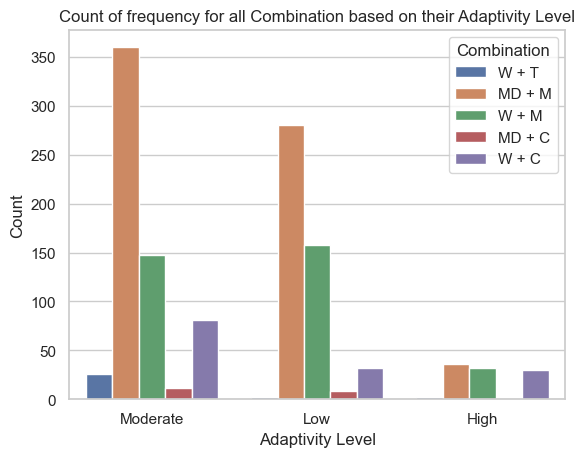

In [12]:
sns.countplot(data = df, x = "Adaptivity Level", hue = "Combination").set(title = "Count of frequency for all Combination based on their Adaptivity Level", ylabel = "Count")

### **Observation from countplot:**

- Countplot gives us information on which `Combination` has the most count for both High and Low of `Adaptivity Level` based on the height of each bar.
- Note that for each `Adaptivity Level`, there are at most 5 bars exist despite of 6 possible combinations from `Internet Type` and `Device`. Thus, it is safe to say those bars that are not exist have count of 0 because supposedly this plot presents the count as height of the bars. 
- For `Adaptivity Level = Low`, combination of `MD + M`(Mobile Data + Mobile) has the most count and the same combination has the most count of `Adaptivity Level = High`.
- This single observation is enough to answer the resaerch question which conclude that combination of **mobile data and mobile** is the best and also the worst combination for students to adapt to online classes.

---

Another alternative that might helps us to find the answer is by producing a **heatmap** visualization. It will be better to create 3 subsets from `countDF` based on `Adaptivity Level` because almost everything that we need for this visualization is already there except for 'Internet Type' and 'Device' columns. We will not use 'Combination' columns as it is not a suitable choice for a heatmap in this case.

In [ ]:
countDF["Internet Type"] = ["WiFi", "WiFi", "WiFi", "WiFi", "WiFi", "WiFi", "WiFi", "WiFi", "WiFi", 
                            "Mobile Data", "Mobile Data", "Mobile Data", "Mobile Data", "Mobile Data", "Mobile Data", "Mobile Data", "Mobile Data", "Mobile Data"]

countDF["Device"] = ["Computer", "Computer", "Computer", "Tab", "Tab", "Tab", "Mobile", "Mobile", "Mobile", 
                     "Computer", "Computer", "Computer", "Tab", "Tab", "Tab", "Mobile", "Mobile", "Mobile"]

countDF

,Combination,Adaptivity Level,Count,Internet Type,Device
0,W + C,High,30,WiFi,Computer
1,W + C,Moderate,81,WiFi,Computer
2,W + C,Low,32,WiFi,Computer
3,W + T,High,2,WiFi,Tab
4,W + T,Moderate,26,WiFi,Tab
5,W + T,Low,2,WiFi,Tab
6,W + M,High,32,WiFi,Mobile
7,W + M,Moderate,147,WiFi,Mobile
8,W + M,Low,158,WiFi,Mobile
9,MD + C,High,0,Mobile Data,Computer


In [ ]:
high = countDF[countDF["Adaptivity Level"] == "High"]
moderate = countDF[countDF["Adaptivity Level"] == "Moderate"]
low = countDF[countDF["Adaptivity Level"] == "Low"]

C:\Users\ACER\AppData\Local\Temp\ipykernel_7932\2210306877.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  (sns.heatmap(data = high.pivot("Device", "Internet Type", "Count"), annot = True, cmap = sns.color_palette("crest", as_cmap = True))


[Text(0.5, 1.0, 'Count for Device and Internet Type combination for High Adaptivity Level'),
 Text(0.5, 20.049999999999997, ''),
 Text(47.25, 0.5, '')]

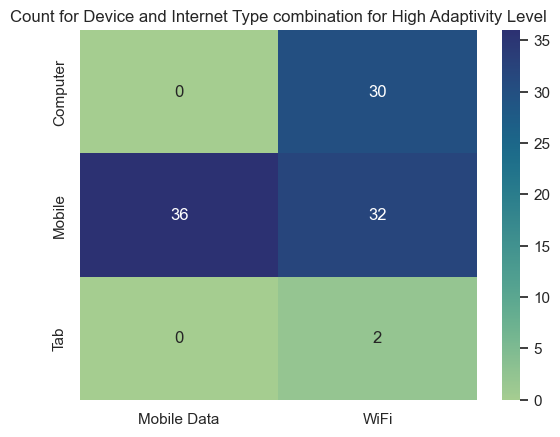

In [ ]:
(sns.heatmap(data = high.pivot("Device", "Internet Type", "Count"), annot = True, cmap = sns.color_palette("crest", as_cmap = True))
    .set(title = "Count for Device and Internet Type combination for High Adaptivity Level", xlabel = "", ylabel = "")
)

C:\Users\ACER\AppData\Local\Temp\ipykernel_7932\827653194.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  (sns.heatmap(data = moderate.pivot("Device", "Internet Type", "Count"), annot = True, cmap = sns.color_palette("crest", as_cmap = True), fmt = "g")


[Text(0.5, 1.0, 'Count for Device and Internet Type combination for Moderate Adaptivity Level'),
 Text(0.5, 20.049999999999997, ''),
 Text(47.25, 0.5, '')]

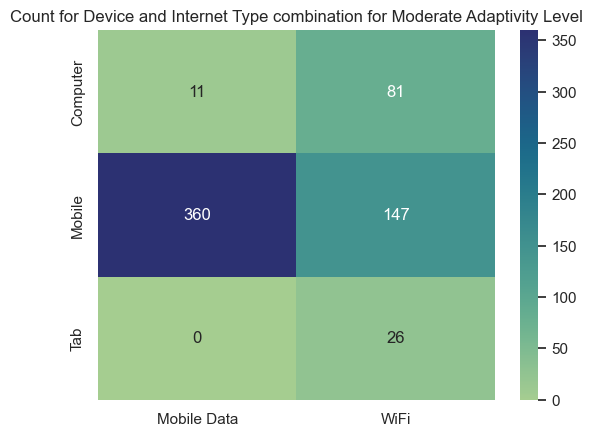

In [ ]:
(sns.heatmap(data = moderate.pivot("Device", "Internet Type", "Count"), annot = True, cmap = sns.color_palette("crest", as_cmap = True), fmt = "g")
    .set(title = "Count for Device and Internet Type combination for Moderate Adaptivity Level", xlabel = "", ylabel = "")
)

C:\Users\ACER\AppData\Local\Temp\ipykernel_7932\2519785177.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  (sns.heatmap(data = low.pivot("Device", "Internet Type", "Count"), annot = True, cmap = sns.color_palette("crest", as_cmap = True), fmt = "g")


[Text(0.5, 1.0, 'Count for Device and Internet Type combination for Low Adaptivity Level'),
 Text(0.5, 20.049999999999997, ''),
 Text(47.25, 0.5, '')]

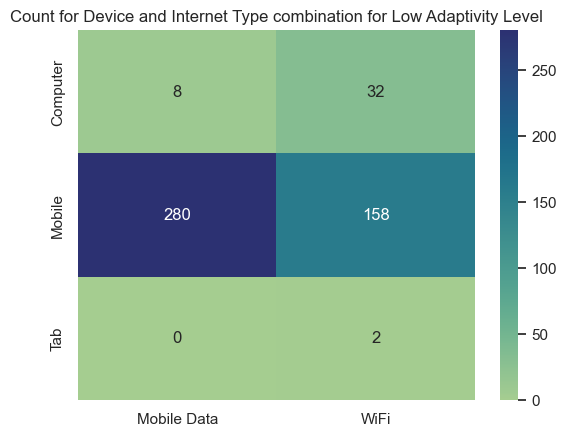

In [ ]:
(sns.heatmap(data = low.pivot("Device", "Internet Type", "Count"), annot = True, cmap = sns.color_palette("crest", as_cmap = True), fmt = "g")
    .set(title = "Count for Device and Internet Type combination for Low Adaptivity Level", xlabel = "", ylabel = "")
)

### **Observation from heatmap:**

- From the first heatmap, combination of `Mobile Data` and `Mobile` has the maximum count of 36 for high `Adaptivity Level`.
- Meanwhile, from the third heatmap, the same combination has the maximum count of 280 for low `Adaptivity Level`.
- As expected, heatmap can answer our question just like countplot and fortunatley, both visualization return the same answer. However, heatmap answer the question by presenting the digits and we need more than one heatmap to do so.

---

Realistically, it is strange to see the combination of mobile data as `Internet Type` and mobile phone as `Device` become the best combination to adapt to online classes because mobile phone has the smallest width of screen compared to a computer and a tablet. Besides, the connection stability of mobile data is also unreliable all the time because it is limited and highly influenced by its location unlike Wi-Fi. 

However, it is acceptable to claim this combination is the worst to adapt to online education due to the same reason. 

Probably the subset size of this combination influence it to have the most count for both high and low level of adaptivity (refer to the cells below).

In previous point plot, we created 6 subsets that dedicated to 6 different combinations (df1, df2, df3, df4, df5, df6). Now, we would like to prove that combination of Mobile Data and Mobile has the most frequency out of all combinations.

As a refresher, below are the information of what combination is dedicated in each subset:
- df1 : W + C (WiFi and Computer)
- df2 : W + T (WiFi and Tab)
- df3 : W + M (WiFi and Mobile)
- df4 : MD + C (Mobile Data and Computer)
- df5 : MD + T (Mobile Data and Tab)
- df6 : MD + M (Mobile Data and Mobile)

In [22]:
countSubset = {"Combination" : ["Wifi and Computer", "Wifi and Tab", "WiFi and Mobile", "Mobile Data and Computer", "Mobile Data and Tab", "Mobile Data and Mobile"],
               "Subset size" : [len(df1.index), len(df2.index), len(df3.index), len(df4.index), len(df5.index), len(df6.index)]}

countSubset = pd.DataFrame(countSubset)
countSubset

,Combination,Subset size
0,Wifi and Computer,143
1,Wifi and Tab,30
2,WiFi and Mobile,337
3,Mobile Data and Computer,19
4,Mobile Data and Tab,0
5,Mobile Data and Mobile,676


Based on the dataframe above, it is obvious that combination of mobile data and mobile has the most size (676 rows) out of all possible combination.

Does the difference of subset size is the only reason that leads to this result? Thus, I would like to investigate this result further by adding a sub-question which is: 

### Sub-question: Does combination of mobile data and mobile phone has the most count for 4G network?

The reason why I choose `Network Type` as the manipulated variable is because despite having mobile data as their `Internet Type`, it is possible for them to be the group of students who has 4G network (the fastest internet network in this dataset) the most. To answer this question, we will observe if this combination of `Internet Type` and `Device` has the most count for 4G.

[Text(0.5, 1.0, 'Count of Network Type based on Combination'),
 Text(0, 0.5, 'Count')]

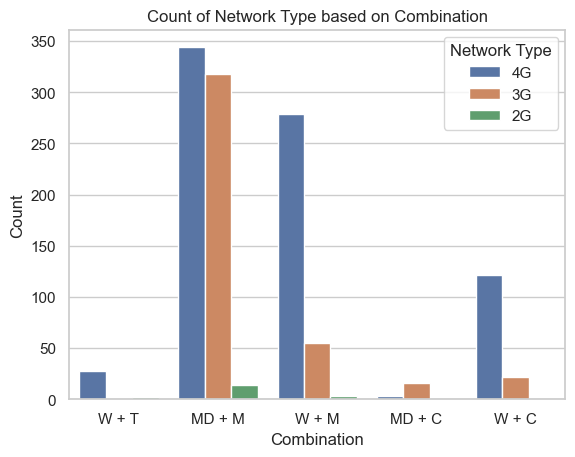

In [25]:
sns.countplot(data = df, x = "Combination", hue = "Network Type").set(title = "Count of Network Type based on Combination", ylabel = "Count")

### Observation from countplot:

- Combination of `MD + M`(Mobile Data & Mobile) has the most count for 4G network and also 2G network.
- This answer our curiosity on why does this combination happen to be the best and at the same time, the worst combination to adapt to online classes. According to the plot, it has the most count for the fastest(4G) and slowest(2G) internet network in the dataset

---
## Conclusion

- Combination of **mobile data and mobile phone** is the best and the wost combination for a group of students from Bangladesh to adapt to their online classes.
- Due to the physical properties of mobile phone and the limitation of mobile data, it is understandable why both of them become the worst combination out of all possible combination.
- However, it is strange to see the same combination also is the best one and the reason is students with this combination are the one who experience 4G network the most. 
- Thus, it is clear now that combination of `Internet Type` and `Device` is not enough to determine students' `Adaptivity Level` because `Network Type` also is a strong influence to the observed variable.